In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os

USE_DRIVE = False
if USE_DRIVE:
    from google.colab import drive

    drive.mount('/content/gdrive')
    ROOT_DRIVE = '/content/gdrive/MyDrive/'
    DRIVE_FOLDER_PATH = os.path.join(ROOT_DRIVE, 'HuBMAP')
    IMAGES_PATH = os.path.join(DRIVE_FOLDER_PATH, 'hubmap-256x256', 'train')
    MASKS_PATH = os.path.join(DRIVE_FOLDER_PATH, 'hubmap-256x256', 'masks')
else:
    IMAGES_PATH = os.path.join('data', '256x256', 'train')
    MASKS_PATH = os.path.join('data', '256x256', 'masks')

In [3]:
!nvidia-smi

fish: Unknown command: nvidia-smi
fish: 
nvidia-smi
^


# DeepLab HuBMAP

In [4]:
from utils import get_device_colab, set_deterministic_colab

NOT_COLAB = True
if not NOT_COLAB:

    DEVICE = get_device_colab()
else:
    DEVICE = 'cpu'

SEED = 42
set_deterministic_colab(SEED)

In [5]:
from model.pretrained_models import get_deeplabv3_resnet

model = get_deeplabv3_resnet(DEVICE, resnet_layers=101).to(DEVICE)

In [6]:
print(model)

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

/home/alessandro/University/ML4CV/HackingTheKidney/training/loop.py:291: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if weights_dir is 'dmyhms':
  0%|          | 0/161 [00:00<?, ?it/s]

Training epoch 1/1:


/home/alessandro/University/ML4CV/HackingTheKidney/venv/lib/python3.9/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Image (torch.Size([16, 3, 256, 256])):
tensor([[[[ 0.7248,  0.7591,  0.8447,  ...,  1.7180,  1.6324,  1.2728],
          [ 0.8276,  0.6734,  0.5364,  ..., -0.6452,  0.2967,  1.5125],
          [ 1.3242,  0.6734, -0.1657,  ...,  0.3309,  1.0844,  1.4269],
          ...,
          [ 1.7009,  1.7009,  1.6838,  ...,  1.7180,  1.7352,  1.7009],
          [ 1.7009,  1.7180,  1.7352,  ...,  1.7180,  1.7352,  1.6838],
          [ 1.6667,  1.6667,  1.6838,  ...,  1.6838,  1.7180,  1.6838]],

         [[-0.6527, -0.5651, -0.4426,  ...,  1.6583,  1.5182,  1.1856],
          [-0.2325, -0.3550, -0.6001,  ..., -0.8277,  0.1176,  1.3606],
          [ 1.0280,  0.3277, -0.6001,  ...,  0.1877,  0.9930,  1.2556],
          ...,
          [ 1.8158,  1.8158,  1.7983,  ...,  1.7983,  1.8158,  1.7983],
          [ 1.7808,  1.7983,  1.8158,  ...,  1.8333,  1.8158,  1.8158],
          [ 1.7808,  1.7808,  1.7983,  ...,  1.8158,  1.7983,  1.8158]],

         [[ 1.2980,  1.3154,  1.4200,  ...,  2.1868,  2.1694,  

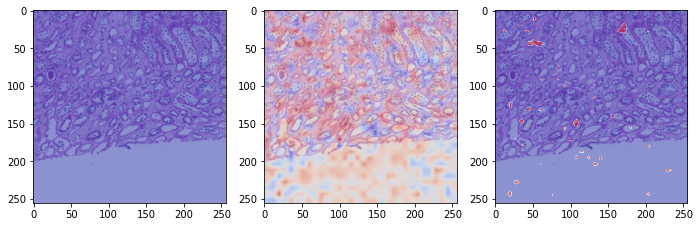

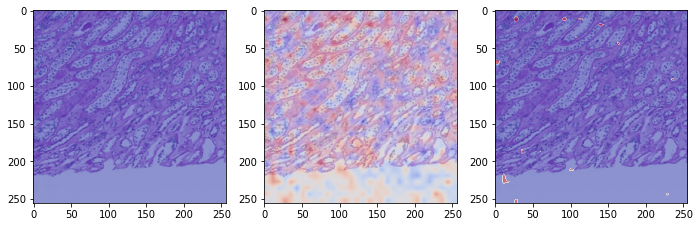

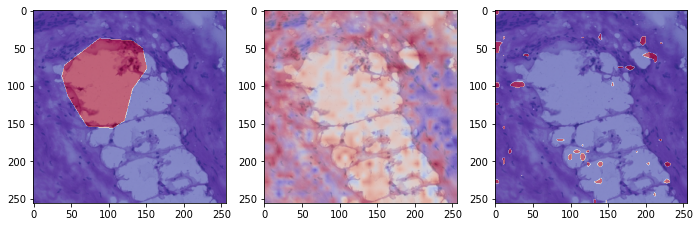

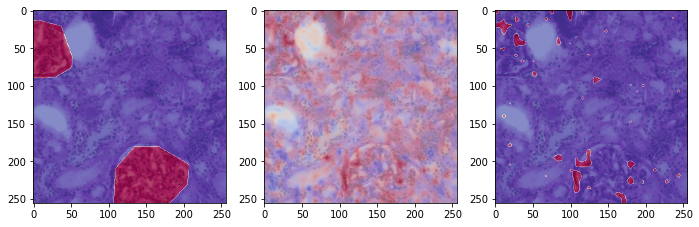

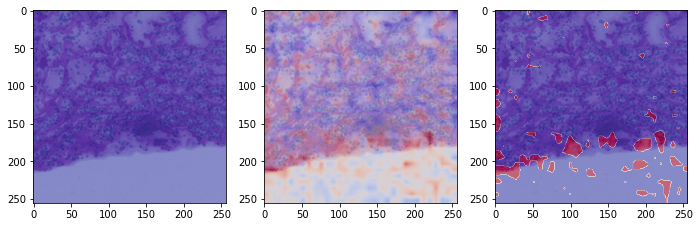

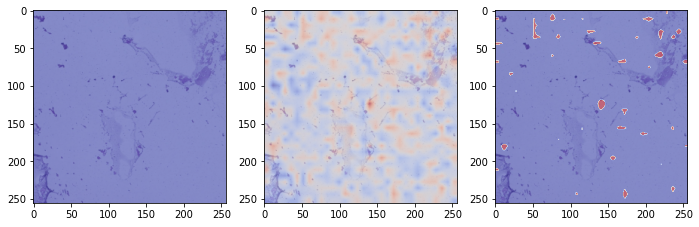

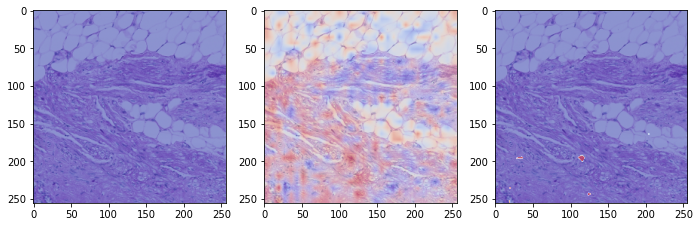

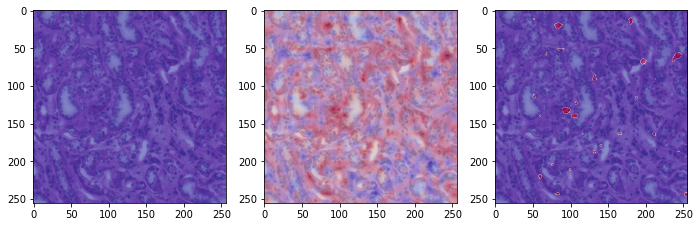

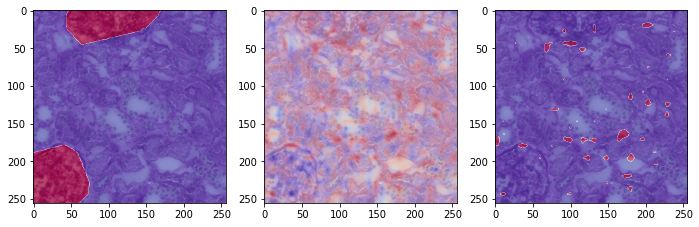

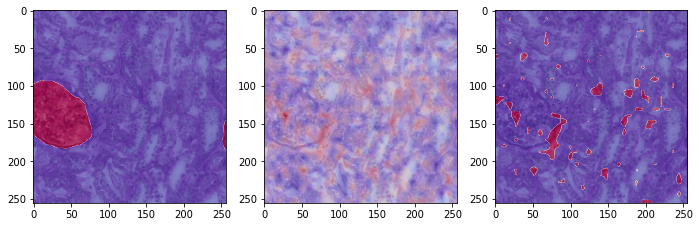

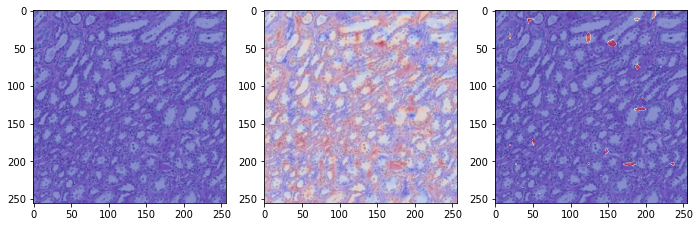

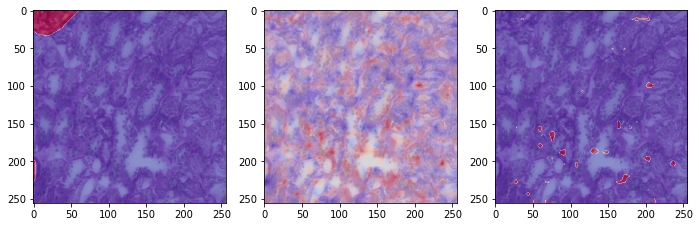

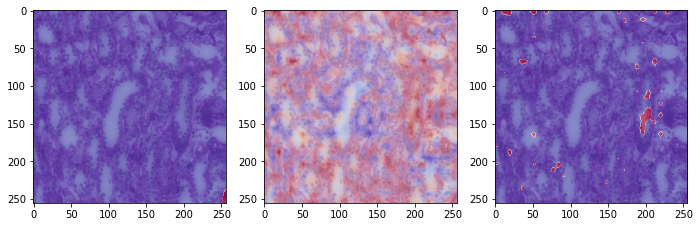

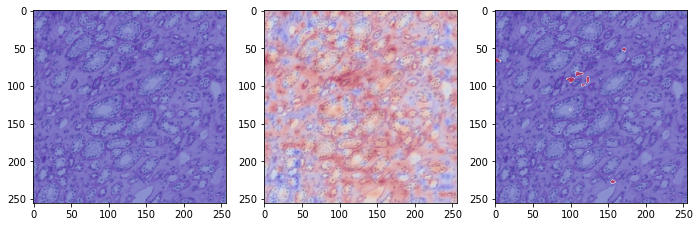

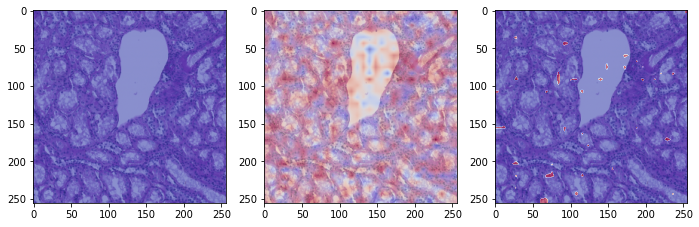

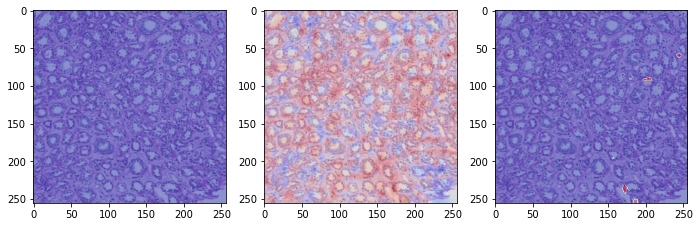

  0%|          | 0/69 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
Validation phase:
Image (torch.Size([16, 3, 256, 256])):
tensor([[[[ 0.5878,  0.7248,  0.6221,  ...,  0.2282,  0.4337,  0.3823],
          [ 0.6392,  0.7762,  0.8447,  ..., -0.0629,  0.3138,  0.5193],
          [ 0.2453,  0.7762,  0.7762,  ...,  0.1768,  0.5193,  0.4851],
          ...,
          [ 0.2796,  0.0056, -0.0116,  ...,  0.6392,  0.6906,  0.7762],
          [ 0.2796, -0.0458,  0.0056,  ...,  0.8104,  0.9646,  1.0502],
          [ 0.6049,  0.1597,  0.0569,  ...,  0.9132,  1.0159,  0.9988]],

         [[-0.4951, -0.4251, -0.7402,  ..., -1.3179, -1.0203, -1.0203],
          [-0.3901, -0.2325, -0.3025,  ..., -1.5455, -1.1078, -0.8102],
          [-0.7577, -0.1275, -0.1099,  ..., -1.1954, -0.7402, -0.7227],
          ...,
          [-0.3725, -0.7052, -0.7752,  ..., -0.5301, -0.4251, -0.1450],
          [-0.3375, -0.7052, -0.7227,  ..., -0.2325,  0.0826,  0.2577],
          [-0.0749

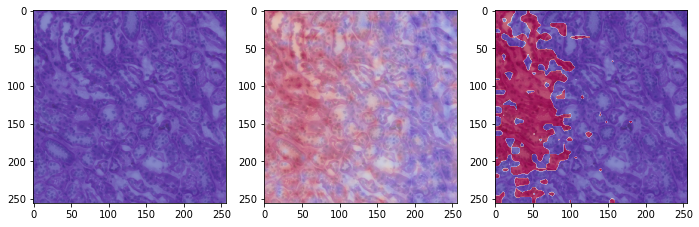

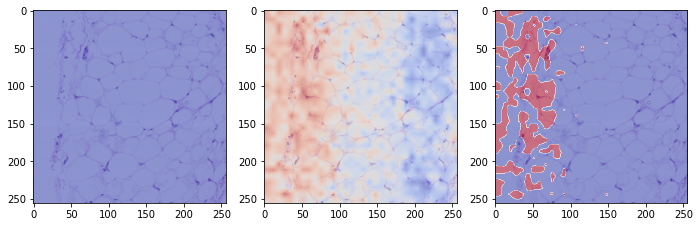

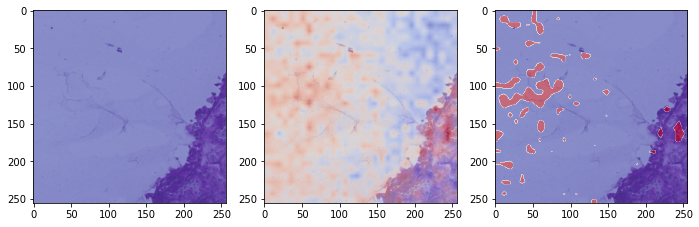

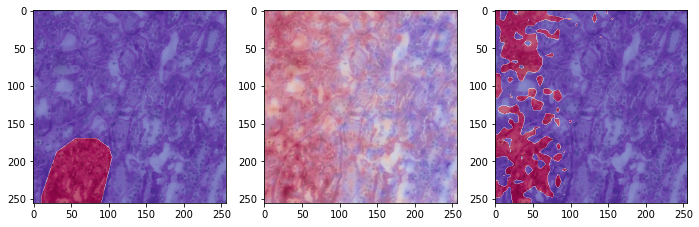

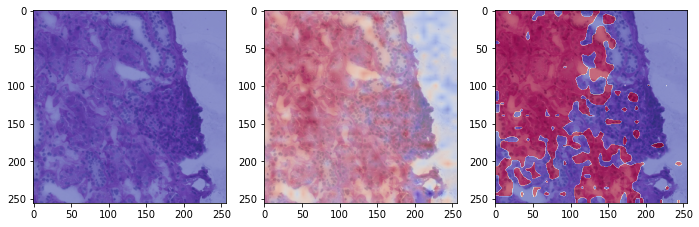

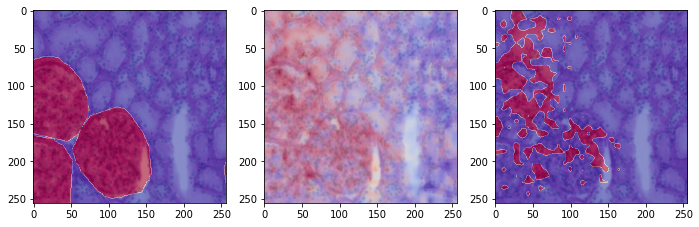

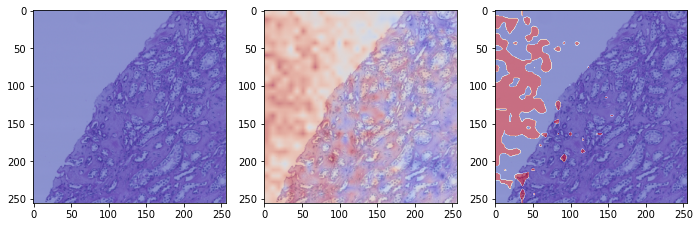

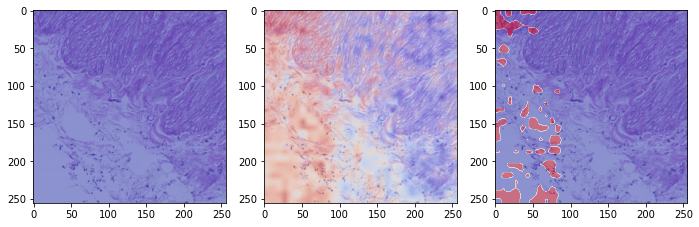

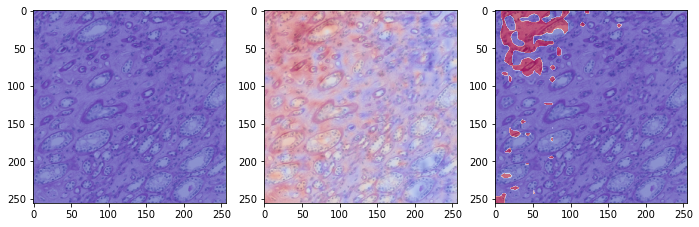

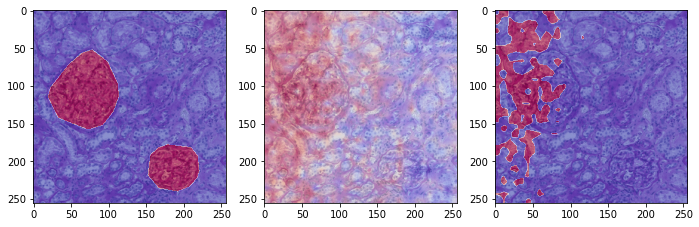

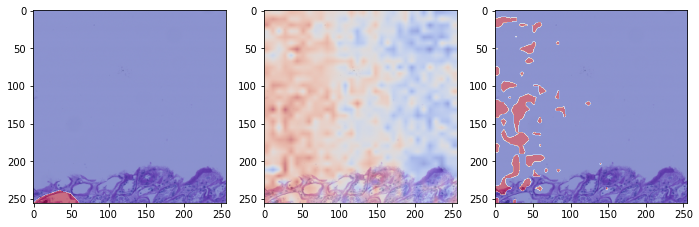

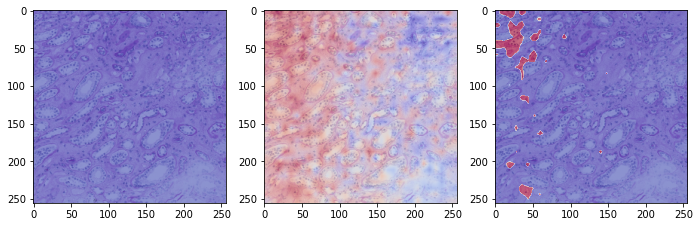

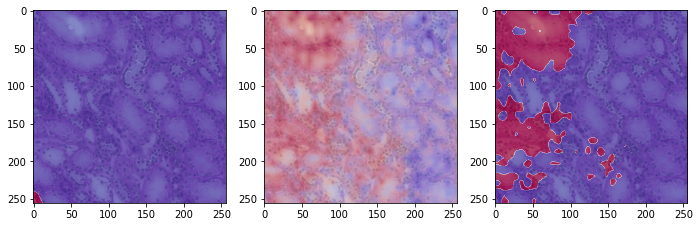

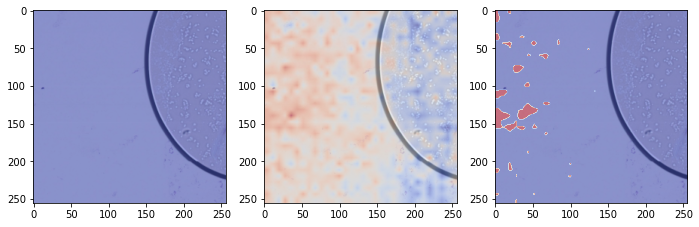

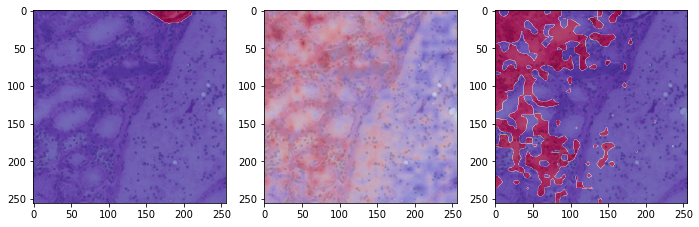

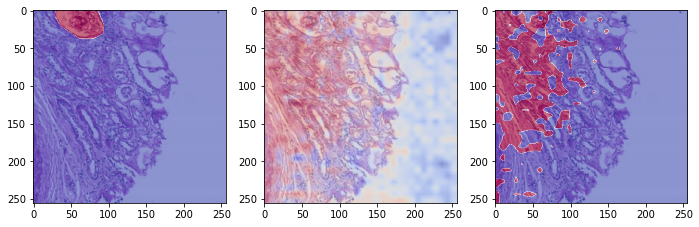

  1%|▏         | 1/69 [00:18<20:53, 18.44s/it]

In [7]:
from preprocessing.dataset import get_training_validation_sets, HuBMAPDataset
from preprocessing.augmentation import get_augmentations
from training.loop import Trainer, TrainerVerbosity
from training.loss_functions import BinaryDiceLoss

import torch
from torchvision import transforms

# From https://pytorch.org/docs/stable/torchvision/models.html
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

training_dataset, training_images, validation_dataset, validation_images = get_training_validation_sets(IMAGES_PATH,
                                                                                                        MASKS_PATH,
                                                                                                        0.3, 
                                                                                                        {'train': get_augmentations(train=True, dihedral_p=0.0, distortion_p=0.0),
                                                                                                         'val': None},
                                                                                                        mean,
                                                                                                        std)

criterion = BinaryDiceLoss(logits=True).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

trainer = Trainer(model,
                  0.3,
                  criterion,
                  optimizer,
                  16,
                  DEVICE,
                  "logs",
                  training_dataset,
                  validation_dataset)

stats, eval_stats = trainer.train(1, 
                                  verbosity_level=[TrainerVerbosity.PROGRESS,
                                                   TrainerVerbosity.IMAGES,
                                                   TrainerVerbosity.TENSORS],
                                  evaluation_verbosity_level=[TrainerVerbosity.PROGRESS,
                                                              TrainerVerbosity.IMAGES,
                                                              TrainerVerbosity.TENSORS],
                                  limit=1,
                                  evaluation_limit=1)

In [8]:
print(stats)

           epoch_time            batch_time                  loss                     iou        dice_coefficient        pixel_accuracy
1  [51.0398166179657]  [50.575021505355835]  [0.9470745325088501]  [0.010103471577167511]  [0.018864983692765236]  [0.9535408020019531]


In [9]:
import pickle
stats.save('logs/stats')

with open('logs/stats', 'rb') as handle:
    b = pickle.load(handle)

print(b)

{1: {'epoch_time': [51.0398166179657], 'batch_time': [50.575021505355835], 'loss': [0.9470745325088501], 'iou': [0.010103471577167511], 'dice_coefficient': [0.018864983692765236], 'pixel_accuracy': [0.9535408020019531]}}


In [10]:
"""
from evaluation.test import Test

tester = Test(model,
              0.3,
              "data/test",
              256,
              0,
              DEVICE)

sub_dict = tester.test("logs/submission.csv", verbose=True)

sub_dict
"""

'\nfrom evaluation.test import Test\n\ntester = Test(model,\n              0.3,\n              "data/test",\n              256,\n              0,\n              DEVICE)\n\nsub_dict = tester.test("logs/submission.csv", verbose=True)\n\nsub_dict\n'